# Realism and Romanticism: A Comparative Analysis of *Pride and Prejudice* and *Jane Eyre*

## Jiaqi Wu

2019.8.19

Introduction to Computational Literary Analysis
UC-Berkeley, Summer 2019
Instructor: Jonathan Reeve

### 1. Introduction

Romanticism and realism mentioned in this paper are two different styles in English literature. As for the characteristics, romanticism shows a combination of a crush on nature, heroism, an emphasis on person's both emotion and sense, and a rebellion against convention. It can be deduced that imagination is significant for romantics. Besides, the sentences from romantics' novels are usually longer and more delicately written(Shmoop Editorial Team).

On the contrary, realists aim to create a world that seems real. To reach the target, realists concentrate more on details and prefer to focus on people's daily lives and portray characters' psychology. Comparing with romantics who often write about persons independent from society, realists are able to depict the real society by describing individuals in social network(Shmoop Editorial Team). 

In one way, romanticism is opposed to realism. Its idealism, aspiration and mysticism contrast with the conscientious adherence to fact in realism(Beers). This paper is written to analyze *Pride and Prejudice* and *Jane Eyre* from the perspective of realism and romanticism. *Pride and Prejudice* is a romantic novel written by Jane Austen in 1813. Although it is a "romantic" novel, it is an example of realism. *Jane Eyre*, published in 1847, is thought to be a combination of realism and romanticism. 

This paper measures two novels' realism and romanticism from several aspects including specific word frequency, characters' social network and the places appeared in the novel. 

### 2. Materials and Methods

Materials used in this paper are two novels, *Pride and Prejudice* and *Jane Eyre*. Research methods are described in three aspects.

#### 2.1 Word Frequency
Several vocabulary word lists are built according to the different characteristics mentioned in Introduction. Nature's word list consists of a few words chosen artificially, because the word list built by WordNet includes lots of words not relating to nature. The word lists used to measure emotion and sense are built with WordNet using Breadth-first search. Verbs related to 'perceive' and nouns related to 'emotion' are extracted. Detail's word list consists of the words relating to food(noun), clothing(noun), eat(verb), drink(verb) and dress(verb). Moreover, there is a color's word list as well. All the related words are generated by WordNet with Breadth-first search.

After these lists are built, the program search both texts and get the count of each list. The program also count "think" in each texts, which partly embodies author's concentration on individuals' thoughts.

Besides, "Spacy" is also used to get emotional adjectives from the sentences whose nominal subject is personal pronoun or character's name, and ROOT is "feel" or "be". The emotional adjectives' count is added to the count of emotion's word list above.

#### 2.2 Characters' Social Network
In order to get social network of two books, two books' character's dictionary are made at first. Then, a graph is created by Networkx. After that, if two names appear simultaneously in one sentence, an edge between these two characters is added to the graph.

#### 2.3 Places
To get the places at which the story takes place, I search the whole text and put all the words whose label_(a tag set by Spacy) is "FAC" or "GPE" or "LOC" or "EVENT" in a list. By counter, both lists' most common words are showed. Some of the places in *Pride and Prejudice* can still be found in today's map. After searching the longitude and latitude or each place in Google Earth, I use folium to draw the map. And I do a place-match work for imaginary places as well, managing to find their locations. 


In [2]:
import requests
import nltk
import json
import pandas as pd
import collections
import spacy
import matplotlib.pyplot as plt
import folium
import networkx as nx
import numpy as np
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
%matplotlib inline

In [3]:
PP = open("/Users/kiki/Desktop/summer_session/cenlab-master/texts/1813_Austen_Jane_PrideandPrejudice_Novel.txt",encoding = "utf-8").read()
JE = open("/Users/kiki/Desktop/summer_session/cenlab-master/texts/1847_Bronte_Charlotte_JaneEyre_Novel.txt",encoding = "utf-8").read()

In [4]:
def AverageLength(text):
    sentences = nltk.sent_tokenize(text)
    num = len(sentences)
    count = 0
    for sen in sentences:
        words = nltk.word_tokenize(sen)
        count += len(words)
    result = count/num
    return result

In [5]:
PP_ave = AverageLength(PP)
JE_ave = AverageLength(JE)

In [6]:
nlp = spacy.load('en_core_web_lg')

In [7]:
PPdoc = nlp(PP)

In [8]:
JEdoc = nlp(JE[:1000000])
JEdoc2 = nlp(JE[1000000:])
JEdocs = [JEdoc, JEdoc2]

In [9]:
# Count the adjective used in the whole text
len(collections.Counter([word.lemma_ for word in PPdoc if word.pos_ == 'ADJ']))

1103

In [10]:
len(collections.Counter([word.lemma_ for word in JEdoc if word.pos_ == 'ADJ']))

2273

In [11]:
#Get the places which are mentioned in the text.
#FAC, GPE, LOC, EVENT
PP_place = [(word.text,word.label_) for word in PPdoc.ents if word.label_ == 'FAC' 
            or word.label_ == 'GPE' or word.label_ == 'LOC' or word.label_ == 'EVENT']

PP_placelist = []
for place in PP_place:
    PP_placelist.append(place[0])
PP_mcp = collections.Counter(PP_placelist).most_common(50)
PP_mcp

[('London', 49),
 ('Charlotte', 44),
 ('Meryton', 41),
 ('Hertfordshire', 32),
 ('Pemberley', 25),
 ('Brighton', 23),
 ('Derbyshire', 22),
 ('Longbourn', 19),
 ('Hunsford', 12),
 ('Netherfield', 11),
 ('Scotland', 8),
 ("St. James's", 6),
 ('Lakes', 5),
 ('England', 4),
 ('Kent', 4),
 ('North', 4),
 ('Newcastle', 4),
 ('Rosings Park', 2),
 ('Grosvenor', 2),
 ('WHITEHALL', 2),
 ('Gracechurch Street', 2),
 ('Park', 2),
 ('Lambton', 2),
 ('Netherfield Park', 1),
 ('Netherfield,', 1),
 ('Netherfield House', 1),
 ('energy;—but', 1),
 ('again?—At', 1),
 ('Netherfield \n', 1),
 ('Westerham', 1),
 ('Easter', 1),
 ('china', 1),
 ('de Bourgh', 1),
 ('De Bourgh', 1),
 ('York', 1),
 ('Parsonage', 1),
 ('Hunsford Lane', 1),
 ('the \nParsonage', 1),
 ('Cambridge;—most', 1),
 ('Ramsgate', 1),
 ('Meryton \n', 1),
 ('the Collinses live', 1),
 ('Northern', 1),
 ('Matlock', 1),
 ('Peak', 1),
 ('the \nLakes', 1),
 ('Oxford', 1),
 ('Blenheim', 1),
 ('Warwick', 1),
 ('Kenelworth', 1)]

In [12]:
PP_loc = {}
for item in PP_mcp:
    PP_loc[item[0]] = {'Loc':[],'Times':item[1]}

# turn the longitude and latitude(aa,bb,cc) into one number
def transloc(l1,l2,l3):
    result = l1 + l2/60 + l3/3600
    return result

PP_loc['London']['Loc'] = [transloc(51,28,18),-transloc(0,5,40)]
PP_loc['Hertfordshire']['Loc'] = [transloc(51,49,48),-transloc(0,14,11)]
PP_loc['Brighton']['Loc'] = [transloc(50,49,29),-transloc(0,8,14)]
PP_loc['Derbyshire']['Loc'] = [transloc(53,8,38),-transloc(1,33,51)]
PP_loc['Hunsford']['Loc'] = [transloc(51,28,19),-transloc(0,37,45)]
PP_loc['Kent']['Loc'] = [transloc(51,18,17),-transloc(0,31,6)]
PP_loc['Newcastle']['Loc'] = [transloc(54,58,54),-transloc(1,37,6)]
PP_loc['Westerham']['Loc'] = [transloc(51,15,57),transloc(0,4,12)]
PP_loc['York']['Loc'] = [transloc(53,57,35),-transloc(1,5,17)]
PP_loc['Warwick']['Loc'] = [transloc(52,17,2),-transloc(1,35,6)]
PP_loc['Kenelworth']['Loc'] = [transloc(52,21,3),-transloc(1,35,25)]
PP_loc
latitude = 51.5
longitude = 0.0
incidents = folium.map.FeatureGroup()
for key in PP_loc.keys():
    if PP_loc[key]['Loc'] != []:
        incidents.add_child(
            folium.CircleMarker(
                [PP_loc[key]['Loc'][0],PP_loc[key]['Loc'][1]],
                #radius = PP_loc[key]['Times']*0.7,
                radius = 10,
                color = 'yellow',
                fill = True,
                fill_color = 'red',
                fill_opacity = 0.4
            )
        )

In [13]:
# Artificially divide the places into two groups
# Imaginary places
Imag_loc_dict = {'Pemberley':[],'Meryton':[],'Longbourn':[],'Netherfield':[],'Lambton':[],'Rosings':[]}
Imag_loc = ['Pemberley','Meryton','Longbourn','Netherfield','Lambton','Rosings']
#Real places
Real_loc = ['London','Hertfordshire','Brighton','Derbyshire','Hunsford','Kent','Newcastle','Westerham','York',
           'Warwick','Kenelworth']

In [14]:
# Do place-match to find imaginary places' locations
Imag_loc_dict = {'Pemberley':[],'Meryton':[],'Longbourn':[],'Netherfield':[],'Lambton':[],'Rosings':[]}
for sent in PPdoc.sents:
    for im in Imag_loc_dict.keys():
        if str(sent).find(im) != -1:
            for loc1 in (Real_loc + Imag_loc):
                if str(sent).find(loc1) != -1 and loc1 != im:
                    Imag_loc_dict[im].append(loc1)

In [15]:
JE_place = [(word.text,word.label_) for word in JEdoc.ents if word.label_ == 'FAC' or word.label_ == 'GPE' or word.label_ == 'LOC' or word.label_ == 'EVENT']
JE_place += [(word.text,word.label_) for word in JEdoc2.ents if word.label_ == 'FAC' or word.label_ == 'GPE' or word.label_ == 'LOC' or word.label_ == 'EVENT']
JE_placelist = []
for place in JE_place:
    JE_placelist.append(place[0])
JE_mcp = collections.Counter(JE_placelist).most_common(50)
JE_mcp

[('England', 36),
 ('Thornfield', 30),
 ('Lowood', 29),
 ('Millcote', 25),
 ('Thornfield Hall', 25),
 ('St. John', 24),
 ('India', 20),
 ('Gateshead', 17),
 ('London', 17),
 ('the moon', 15),
 ('ma’am', 15),
 ('Fairfax', 14),
 ('Providence', 8),
 ('Europe', 7),
 ('Ireland', 7),
 ('Gateshead Hall', 5),
 ('Rochester', 5),
 ('Paris', 5),
 ('Jamaica', 5),
 ('Vale Hall', 5),
 ('earth', 4),
 ('Hay Lane', 4),
 ('Rome', 4),
 ('St. John Rivers', 4),
 ('Cambridge', 4),
 ('France', 3),
 ('Thornfield \nHall', 3),
 ('St. John’s', 3),
 ('Moor House', 3),
 ('Hall', 3),
 ('Norway', 2),
 ('Atlantic', 2),
 ('Marseilles', 2),
 ('Augusta', 2),
 ('Northumberland', 2),
 ('the \nhall', 2),
 ('Continent', 2),
 ('the Holy Virgin', 2),
 ('the George Inn', 2),
 ('Ingram Park', 2),
 ('the West Indies', 2),
 ('Mason!—the West Indies', 2),
 ('Egypt', 2),
 ('Albion', 2),
 ('Eden', 2),
 ('Naples', 2),
 ('Funchal', 2),
 ('West', 2),
 ('North', 1),
 ('the Northern Ocean', 1)]

In [16]:
JE_loc = {}
for item in JE_mcp:
    JE_loc[item[0]] = {'Loc':[],'Times':item[1]}
JE_loc['London']['Loc'] = [transloc(51,28,18),-transloc(0,5,40)]
incidents.add_child(
            folium.CircleMarker(
                [JE_loc['London']['Loc'][0],JE_loc['London']['Loc'][1]],
                radius = JE_loc['London']['Times']*0.7,
                color = 'yellow',
                fill = True,
                fill_color = 'blue',
                fill_opacity = 0.4
            )
        )

In [17]:
# get word group using WordNet by BFS
def get_set(word, pos_):
    Syns = list(wn.synsets(word,pos = pos_))
    queue = []
    items = []
    queue += Syns[0].hyponyms()
    items += Syns[0].hyponyms()

    while len(queue) >= 1:            #still can search
        for item in queue:
            queue.remove(item)
            items += item.hyponyms()  #find the hyponym
            queue += item.hyponyms()
        
    item_set = [str(item)[8:-7].replace('_',' ') for item in items]
    return item_set

colors_set = get_set('color','n')

def getcolors(Doc):
    color_result = []
    for word in Doc:
        if word.text in colors_set and word.pos_ == 'ADJ':
            color_result.append(word.text)
    return color_result
            
PPcolors = getcolors(PPdoc)
JEcolors = getcolors(JEdoc)+getcolors(JEdoc2)

In [18]:
PPcolor_mount = []
PPcolor_name = []
PPcolor_label = []
for pair in collections.Counter(PPcolors).most_common(20):
    PPcolor_mount.append(pair[1])
    PPcolor_label.append(pair[0])
    if pair[0] == 'sanguine':          #this color cannot be showed so I found a similar color to replace it
        PPcolor_name.append('darkred')
    elif pair[0] == 'scarlet':
        PPcolor_name.append('r')
    else:
        PPcolor_name.append(pair[0])

In [19]:
JEcolor_mount = []
JEcolor_name = []
JEcolor_label = []
for pair in collections.Counter(JEcolors).most_common(20):
    JEcolor_mount.append(pair[1])
    JEcolor_label.append(pair[0])
    if pair[0] == 'crimson':
        JEcolor_name.append('firebrick')
    elif pair[0] == 'sanguine':
        PPcolor_name.append('darkred')
    elif pair[0] == 'scarlet':
        JEcolor_name.append('r')
    elif pair[0] == 'hazel':
        JEcolor_name.append('tan')
    elif pair[0] == 'blond':
        JEcolor_name.append('gold')
    else:
        JEcolor_name.append(pair[0])

In [20]:
#Use dictionary to build network.
PP_Characters = {'Elizabeth':{},'Darcy':{},'Jane':{},'Bingley':{},'Mr. Bennet':{},'Mrs. Bennet':{},'Wickham':{},'Lydia':{},'Mr. Collins':{}
                 ,'Miss Bingley':{},'Catherine':{},'Charlotte':{},'Georgiana':{}}
for sent in PPdoc.sents:
    for name in PP_Characters.keys():
        if str(sent).find(name) != -1:
            for name1 in PP_Characters.keys():
                if str(sent).find(name1) != -1 and name1 != name:
                    if name1 not in PP_Characters[name].keys():
                        PP_Characters[name][name1] = 0
                    PP_Characters[name][name1] += 1

In [21]:
PP_G = nx.DiGraph() # create a graph by NetworkX
for a in PP_Characters.keys():
    for b in PP_Characters[a].keys():
        PP_G.add_edge(a,b,weight = PP_Characters[a][b]/2)

In [22]:
PP_nsize = []
for char in PP_Characters.keys():
    n = 0
    for key in PP_Characters[char].keys():
        n += PP_Characters[char][key]
    PP_nsize.append(n)
PP_weights = np.array([weight/100 for weight in PP_nsize])

In [23]:
JE_Characters = {'I':{},'Rochester':{},'St. John':{},'Mrs. Reed':{},'Bessie Lee':{},'Mr. Lloyd':{},
                 'Eliza':{},'John Reed':{},'Helen':{},'Georgiana':{}}
for sent in JEdoc.sents:
    for name in JE_Characters.keys():
        if str(sent).find(name) != -1:
            for name1 in JE_Characters.keys():
                if str(sent).find(name1) != -1 and name1 != name:
                    if name1 not in JE_Characters[name].keys():
                        JE_Characters[name][name1] = 0
                    JE_Characters[name][name1] += 1

In [24]:
JE_G = nx.DiGraph() # create a graph by NetworkX
for a in JE_Characters.keys():
    for b in JE_Characters[a].keys():
        JE_G.add_edge(a,b,weight = JE_Characters[a][b]/2)
JE_nsize = []
for char in JE_Characters.keys():
    n = 0
    for key in JE_Characters[char].keys():
        n += JE_Characters[char][key]
    JE_nsize.append(n)
JE_weights = np.array([weight/100 for weight in JE_nsize])

In [25]:
#In order to put two images together, adjust the positions of each point artificially

pos_JE = {'I':(10,5),'Rochester':(2,5),'St. John':(5,3),'Mrs. Reed':(5,7),'Bessie Lee':(7,1),
          'Mr. Lloyd':(7,9),'Eliza':(13,1),'John Reed':(13,9),'Helen':(15,3),'Georgiana':(16,7)}

pos_PP = {'Elizabeth':(10,15),'Darcy':(2,15),'Jane':(5,13),'Bingley':(5,17),'Mr. Bennet':(7,11),
          'Mrs. Bennet':(7,19),'Wickham':(0,14),'Lydia':(20,16),'Mr. Collins':(18,15),
        'Miss Bingley':(13,11),'Catherine':(13,19),'Charlotte':(15,13),'Georgiana':(16,17)}


In [26]:
def lemma_count(target_word, Doc):
    count = 0
    for word in Doc:
        if word.lemma_ == target_word:
            count += 1
    return count

In [27]:
def lemma_count_set(wordset,Doc):
    count = 0
    for word in Doc:
        if word.lemma_ in wordset:
            count += 1
    return count

In [28]:
PP_think_count = lemma_count('think',PPdoc)
JE_think_count = lemma_count('think',JEdoc) + lemma_count('think',JEdoc2)
PP_think_count, JE_think_count

(328, 451)

In [29]:
get_set('dress','v')

['bundle up',
 'change',
 'cross-dress',
 'dandify',
 'dress',
 'dress down',
 'overdress',
 'prink',
 'wear',
 'vest',
 'bedizen',
 'enrobe',
 'prank',
 'preen',
 'tart up',
 'hat',
 'scarf',
 'slip on',
 'try on',
 'bonnet']

In [30]:
item_set = get_set('food','n') + get_set('clothing','n') + get_set('eat','v') + get_set('drink','v') + get_set('dress','v') + get_set('furniture','n')
PP_item = lemma_count_set(item_set,PPdoc)
JE_item = lemma_count_set(item_set,JEdoc) + lemma_count_set(item_set,JEdoc2)
PP_item, JE_item

(861, 2606)

In [31]:
perceive_set = get_set('perceive','v') 
PP_perceive = lemma_count_set(perceive_set,PPdoc)
JE_perceive = lemma_count_set(perceive_set,JEdoc) + lemma_count_set(perceive_set,JEdoc2)
PP_perceive, JE_perceive

(1048, 1776)

In [32]:
# extract adjectives representing emotions
def extract_emotion(characters, doc):
    person_list = ['I','He','She','They']+characters
    feel_set = ['feel','feels','felt','is','are','am','was','were','looks','looked']
    emotion_word = []
    sent = ""
    for word in doc:
        # Firstly make sure the subject is person and avoid repetition
        if word.text in person_list and word.dep_ == 'nsubj' and sent != str(word.sent): 
            for word1 in word.sent:
                if word1.dep_ == 'ROOT' and (word1.text in feel_set):
                    sent = str(word.sent)
                    emotion_word += [child for child in word1.children if child.pos_ == 'ADJ' and child.text != 'sure']
                    break
    return emotion_word

In [33]:
PP_Characters_list = ['Elizabeth','Darcy','Jane','Bingley','Bennet','Wickham','Lydia','Mr. Collins',
                 'Miss Bingley','Catherine','Charlotte','Georgiana']
JE_Characters_list =  ['Rochester','John','Reed','Bessie','Lee','Lloyd','Eliza','Helen','Georgiana']

In [34]:
emotion_set = get_set('emotion','n')
PP_emotion = lemma_count_set(emotion_set, PPdoc) + len(extract_emotion(PP_Characters_list, PPdoc))
JE_emotion = lemma_count_set(emotion_set, JEdoc) + lemma_count_set(emotion_set,JEdoc2) + len(extract_emotion(JE_Characters_list, JEdoc) + extract_emotion(JE_Characters_list, JEdoc2))
PP_emotion, JE_emotion

(824, 1062)

In [35]:
#nature_set = get_set('mountain','n') + get_set('flower','n') + get_set('tree','n') + get_set('body_of_water','n')
nature_set = ['mountain','hill','sky','flower','tree','river','sea','star','grass']
PP_nature = lemma_count_set(nature_set,PPdoc)
JE_nature = lemma_count_set(nature_set,JEdoc) + lemma_count_set(nature_set,JEdoc2)
PP_nature, JE_nature

(19, 260)

In [36]:
PPlen = len(PPdoc)
JElen = len(JEdoc) + len(JEdoc2)
PPlen, JElen

(153904, 249092)

In [37]:
PP_features = [PP_nature/PPlen, PP_emotion/PPlen, (PP_perceive-PP_think_count)/PPlen, 
               PP_item/PPlen,PP_think_count/PPlen,PP_ave/10000]

In [38]:
JE_features = [JE_nature/JElen, JE_emotion/JElen, (JE_perceive-JE_think_count)/JElen, 
               JE_item/JElen,JE_think_count/JElen,JE_ave/10000]

In [39]:
JE_ave, PP_ave

(32.862555066079295, 24.538277511961724)

In [40]:
feature_data = [PP_features, JE_features]

In [41]:
DF_feature = pd.DataFrame(feature_data,index = ['Pride and Prejudice','Jane Eyre'],
                          columns = ['Nature','Emotion','Perceive','Detail','Think','AveLen(/10000)']).T

### 3. Result and Discussion

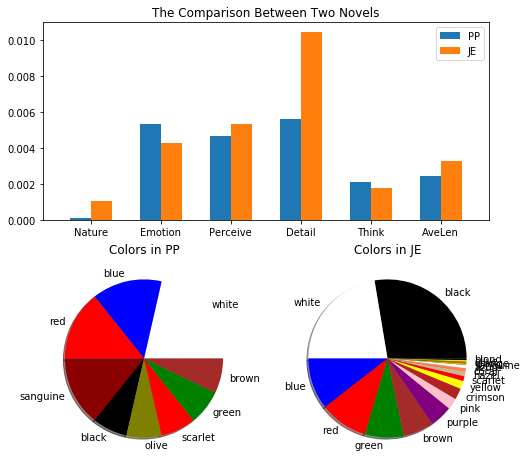

In [42]:
x = np.arange(6)
total_width, n = 0.6, 2
width = total_width / n
x = x - (total_width - width) / 2
plt.figure(figsize = (8,8))
plt.subplot(223)
plt.pie(PPcolor_mount, labels = PPcolor_label, colors = PPcolor_name, shadow = True)
plt.title("Colors in PP")
plt.subplot(224)
plt.pie(JEcolor_mount, labels = JEcolor_label, colors = JEcolor_name, shadow = True)
plt.title("Colors in JE")
plt.subplot(211)
plt.bar(x, PP_features,  width=width,label = 'PP')
plt.bar(x + width, JE_features, width=width,label = 'JE')
plt.bar(x + 0.5*width,[0,0,0,0,0,0],tick_label = ['Nature','Emotion','Perceive','Detail','Think','AveLen'],)
plt.title("The Comparison Between Two Novels")
plt.legend()

#### 3.1 Basic Analysis
As for "nature", comparing with *Pride and Prejudice*, there are a lot more descriptions of nature in *Jane Eyre* apparently. Considering romantics' preference of writing about nature, *Jane Eyre* is more likely to belong to romanticism. In *Jane Eyre*, I found a sentence which is" Self-abandoned, relaxed, and effortless, I seemed to have laid me down in the dried-up bed of a great river; I heard a flood loosened in remote mountains, and felt the torrent come". It indicates a very romantic way of writing.

When it comes to "emotion" and "perceive", two novels' results are similar. The emotion description's frequency of *Pride and Prejudice* is even higher than that of *Jane Eyre*, which is opposite to the hypothesis above. Both two authors like to describe characters' emotions and what they see or listen. These two aspects are related to romanticism measurement, however, no conclusions can be deduced here.

Detail serves as an important measurement for realism. The result shows a higher frequency of details in *Jane Eyre*, which means that Bronte truly writes a lot about individuals' daily lives, like what they are eating, drinking and dressing. Details give reader a feeling of verisimilitude. Therefore, it can be concluded that realism exists in Bronte's work. Meanwhile, I think that this result may not be very convincing because the detail word list only contains some words about clothing , eating and furniture which probably is not comprehensive enough to measure details.

Although *Pride and Prejudice* perceives less, it thinks a little more than *Jane Eyre*. The word count of "think" is used because realists prefer to analyze individuals' thoughts more, depicting characters' inward world. However, the difference is not obvious as well. 

As for the average length of sentence, *Pride and Prejudice*'s length is 24 while *Jane Eyre*'s length is 32. This difference is significant, showing different writing styles of these two authors. Austen prefers to write in a more concise style while Bronte prefers to write in a more delicate way. Besides, Bronte also use more different adjectives and colors in her writings. It can be seen in the chart that the colors used in *Jane Eyre* is various while *Pride and Prejudice* only includes nine colors in the whole book. Bronte shows her abundant vocabulary in the novel, using different words to describe those similar colors. The discovery above probably can be interpreted as the result of Bronte's more delicate style of writing. 

/Users/kiki/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


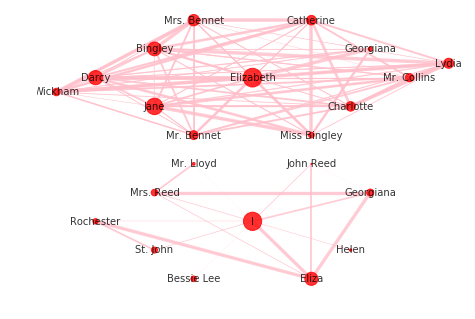

In [43]:
nx.draw(PP_G,pos = pos_PP,node_color = 'red',alpha = 0.8, edge_color = 'pink',width = PP_weights, arrows = False, with_labels = True,font_size = 10,node_size = PP_nsize)
nx.draw(JE_G,pos = pos_JE,node_color = 'red',alpha = 0.8, edge_color = 'pink', width = JE_weights, arrows = False, with_labels = True,font_size = 10,node_size = JE_nsize)

#### 3.2 Social Network's Analysis
It is apparent that *Pride and Prejudice*'s network is much more complex than *Jane Eyre*'s. In *Pride and Prejudice*, it seems like that most people know each other. They meet at some events together, like the ball, participating actively in some social activities. However, as for *Jane Eyre*, its social network is simple. Most of the characters in *Jane Eyre* have strong correlations with Jane but weak
 or no correlations with other characters. They are persons who appear in Jane Eyre's different periods of life. Putting individuals into social network helps realists describe the real society, for example, shows how people interact with others who are from different classes. In *Pride and Prejudice*, there are lots of descriptions about class distinction which is a significant social issue at that time. 

In [44]:
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)
san_map.add_child(incidents)

In [45]:
Imag_loc_dict

{'Pemberley': ['Lambton', 'London', 'Hertfordshire', 'Lambton'],
 'Meryton': ['Longbourn',
  'Hunsford',
  'Netherfield',
  'Netherfield',
  'Netherfield',
  'Netherfield',
  'Longbourn',
  'Longbourn',
  'Brighton',
  'Hunsford',
  'Longbourn',
  'Rosings'],
 'Longbourn': ['Netherfield',
  'Meryton',
  'Netherfield',
  'Meryton',
  'Meryton',
  'Brighton',
  'Hunsford',
  'Meryton',
  'Rosings',
  'Derbyshire',
  'Derbyshire',
  'Netherfield',
  'London'],
 'Netherfield': ['Hertfordshire',
  'Longbourn',
  'Longbourn',
  'Meryton',
  'Meryton',
  'Meryton',
  'Meryton',
  'London',
  'Rosings',
  'Hertfordshire',
  'Derbyshire',
  'Longbourn'],
 'Lambton': ['Pemberley', 'Pemberley'],
 'Rosings': ['Hunsford',
  'Hunsford',
  'Hunsford',
  'Hunsford',
  'Kent',
  'Hunsford',
  'Hunsford',
  'Meryton',
  'Longbourn',
  'Netherfield']}

 
#### 3.3 Places' Analysis
The result of place research shows differences in these two books. In *Pride and Prejudice*, there are many real places, like Hertfordshire and Derbyshire, and some imaginary places as well. The place-match work shows that there are a few sentences which include an imaginary place and another place. After examining the places often appear together, some locations can be deduced, for example, Pemberley is near to Lambton and Rosings is in Hunsford. Meanwhile, except for the places which are not related to where the story takes place, most places in *Jane Eyre* are imaginary places. 

Realists prefer to depict the real world, making readers feel that they are watching real life(Shmoop Editorial Team). Making the story happen in real places can give readers this kind of feeling, while setting the story in imaginary places could lead to a loss of authenticity. Although Jane Austen also uses some imaginary places, the places' locations can be found in her novel. However, as for Bronte, imaginary places in her novel keep ambiguous. The stories happen in Northern England but the specific locations cannot be found. Therefore, in this part, *Pride and Prejudice* shows more realism.

### 4. Conclusion
Considering the word frequency of specific topics, the characters' social network and the places mentioned in these two novels, this paper draws a conclusion that *Pride and Prejudice* is a novel of realism while *Jane Eyre* is a combination of both realism and romanticism. Although this paper is still limited, and lots of other characteristics of realism and romanticism are still waiting to be tested, it has analyzed some characteristics from a new computational perspective. I hope it can help a little for the comparative analysis of *Jane Eyre* and *Pride and Prejudice*.

### Works Cited:
1. Griffin, Cynthia. “The Development of Realism in Jane Austen's Early Novels.” *ELH*, vol. 30, no. 1, 1963, pp. 36–52. *JSTOR*, www.jstor.org/stable/2871905.
2. Beers, Henry A. *A History of English Romanticism in the Eighteenth Century (Routledge Revivals)*. Routledge, 2015.
3. Searle, Alison. "An idolatrous imagination? Biblical theology and romanticism in Charlotte Bronte's Jane Eyre." *Christianity and Literature*, vol. 56, no. 1, 2006, p. 35+. *Gale Academic Onefile*, Accessed 16 Aug. 2019.
4. Shmoop Editorial Team. "Realism Characteristics." *Shmoop*. Shmoop University, Inc., 11 Nov. 2008. Web. 19 Aug. 2019.
5. Shmoop Editorial Team. "Romanticism Characteristics." *Shmoop*. Shmoop University, Inc., 11 Nov. 2008. Web. 19 Aug. 2019.